# LABB 2

## Using synthetic data and ML to solve the problem of differentiating between obese Pichus and Pikachus

### Objective
The purpose of this lab is to utilize the tools you have learned in Python to implement a simplified machine learning algorithm.

### Overview
In this lab, there is simulated data on the lengths and widths of Pichus and Pikachus. Your task is to create an algorithm that can classify a new data point as either Pichu or Pikachu based on the given data.

---

### Basic Task
Follow this flowchart to build the basic algorithm.
- Test Data Coordinates: `(25,32), (24.2,31.5), (22,34), (20.5,34)`

#### Expected Results
- Sample with (width, height): `(25, 32)` classified as Pikachu
- Sample with (width, height): `(24.2, 31.5)` classified as Pikachu
- Sample with (width, height): `(22, 34)` classified as Pikachu
- Sample with (width, height): `(20.5, 34)` classified as Pichu

---

### Additional Tasks
Complete these tasks once you have correctly classified the test data.
1. Allow the user to input a test point and have the algorithm determine its class.
    - Include error handling for negative numbers and non-numeric inputs. Make sure to provide user-friendly error messages.
2. The nearest-point approach we have used may misclassify when the points of each class overlap.
    - Now choose the ten nearest points to your test point.
    - The class of the test point is determined by majority voting among the nearest points.



[['21.959384499160468' ' 31.23956701424158' ' 0']
 ['23.63591632187622' ' 36.46821490673444' ' 1']
 ['17.714056417303343' ' 31.44170391314962' ' 0']
 ['21.78020031891186' ' 33.213397759738264' ' 1']
 ['25.20630552859312' ' 36.558816149350534' ' 1']
 ['19.332572350434354' ' 32.25325633655492' ' 0']
 ['24.73645685241186' ' 35.33291181124776' ' 1']
 ['23.79257560586339' ' 38.10372825362463' ' 1']
 ['24.557612968127465' ' 36.73144402805611' ' 1']
 ['20.191281253428173' ' 35.06966921830237' ' 0']
 ['25.813562951888365' ' 35.561029988644336' ' 1']
 ['24.923378667802954' ' 34.463907946680294' ' 1']
 ['25.311244044578427' ' 34.117212558131975' ' 1']
 ['22.819091361866796' ' 34.25516433025548' ' 1']
 ['19.639358214988224' ' 34.56117030001663' ' 0']
 ['18.341233265627693' ' 31.399261188293124' ' 0']
 ['22.723629043769336' ' 34.83845262048311' ' 1']
 ['25.82936770950206' ' 33.16210202637511' ' 1']
 ['20.23890182459327' ' 32.78945132868386' ' 0']
 ['17.905128921789093' ' 28.88813385482529' ' 0']
 

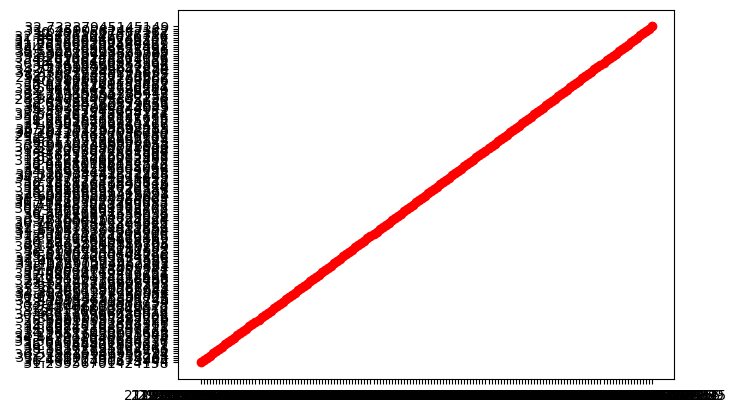

In [318]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sorted = [] # sorted list of data points

with open('resources/datapoints.txt', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        sorted.append(row)
sorted = sorted[1:] 
sorted = np.array(sorted)
print(sorted)

